In [218]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [219]:
#Mouting google drive to access data 
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    print("Mounted With Google Drive")
    COLAB = True
    %tensorflow_version 2.x
except:
    COLAB = False

Mounted at /content/drive
Mounted With Google Drive


In [220]:
#We have stored data in My drive/agan folder
DATA_PATH = '/content/drive/My Drive/Dataset'

In [221]:
#Our test and train directory have specified below
train_data_dir  = '/content/drive/My Drive/Dataset/train'
validation_data_dir  = '/content/drive/My Drive/Dataset/test'

In [222]:
#Configuring the dataset

#Batch size is 10(Will take 10 image for each run)
batch_size = 10
#Epoch is 50(Will run 50times)
epochs = 10
#Image heigh and widh reduced here for faster train and test
img_height = 150
img_width = 150

In [223]:
#Normalizing the train and test generator for our model
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [224]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=5,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=5,
        class_mode='binary')

Found 2421 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [225]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [226]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [227]:
nb_epoch = 5
nb_train_samples = 5
nb_validation_samples = 5

In [228]:
model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples,
        epochs=nb_epoch,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
5/5 [==============================] - 4s 698ms/step - loss: 0.7086 - accuracy: 0.2522 - val_loss: 0.8578 - val_accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - 4s 873ms/step - loss: 0.6829 - accuracy: 0.6494 - val_loss: 0.8569 - val_accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 5s 1s/step - loss: 0.6565 - accuracy: 0.7289 - val_loss: 0.9973 - val_accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 3s 679ms/step - loss: 0.6502 - accuracy: 0.6772 - val_loss: 0.9435 - val_accuracy: 0.0000e+00
Epoch 5/5
5/5 [==============================] - 3s 610ms/step - loss: 0.7685 - accuracy: 0.3967 - val_loss: 0.7676 - val_accuracy: 0.0000e+00


In [229]:
model.evaluate_generator(validation_generator, nb_validation_samples)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.7716171741485596, 0.0]

In [230]:
#Creating Train Data Generator with the selected configuration
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_data_dir,
                                                           shuffle=True,
                                                           target_size=(img_width, img_height),
                                                           class_mode='binary')

Found 2421 images belonging to 2 classes.


In [231]:
#Creating Test Data Generator with the selected configuration
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_data_dir,
                                                              target_size=(img_width, img_height),
                                                              class_mode='binary')

Found 50 images belonging to 1 classes.


In [232]:
#Storing train_data_generator into simple_training_images
sample_training_images, _ = next(train_data_gen)

In [233]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

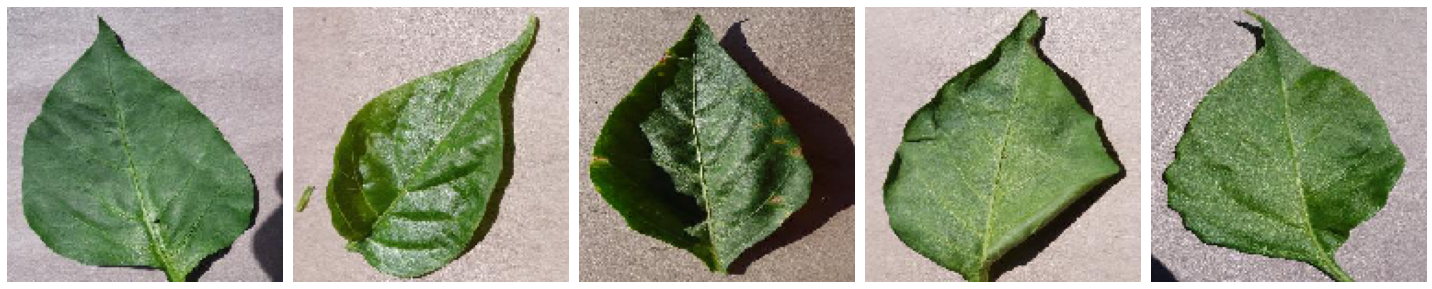

In [234]:
#Showing Training images including Normal and Efected
import matplotlib.pyplot as plt
plotImages(sample_training_images[:10])

In [235]:
#Creating our main CNN model to augment images
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_width, img_height ,3)),
    MaxPooling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation='relu'),
    
    Dense(1)
])

In [236]:
#Adding ADAM optimizer to optimize output
#importing tensorflow
import tensorflow as tf
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [237]:
#Printing Model Summery
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 20736)           

In [238]:
#Training our model with 50 epoch


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=50 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=40 // batch_size
)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


5/5 [==============================] - 8s 1s/step - loss: 1.6433 - accuracy: 0.4219 - val_loss: 0.3037 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 0.8595 - accuracy: 0.3111 - val_loss: 1.0376 - val_accuracy: 0.1250
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.6124 - accuracy: 0.6881 - val_loss: 0.9609 - val_accuracy: 0.7500
Epoch 4/10
5/5 [==============================] - 5s 1s/step - loss: 0.6341 - accuracy: 0.5850 - val_loss: 0.8790 - val_accuracy: 0.8250
Epoch 5/10
5/5 [==============================] - 5s 881ms/step - loss: 0.6092 - accuracy: 0.7594 - val_loss: 0.7345 - val_accuracy: 0.8750
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.4178 - accuracy: 0.9033 - val_loss: 0.9335 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 6s 997ms/step - loss: 0.4819 - accuracy: 0.7669 - val_loss: 0.8300 - val_accuracy: 0.6500
Epoch 8/10
5/5 [==============================

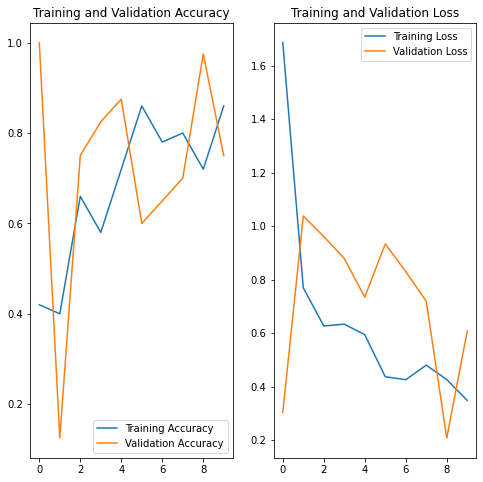

In [239]:
#Showing accuracy and loss graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [240]:
#Basic Augmentation
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True)

In [241]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_data_dir,
                                               shuffle=True,
                                               target_size=(img_width, img_height))

Found 2421 images belonging to 2 classes.


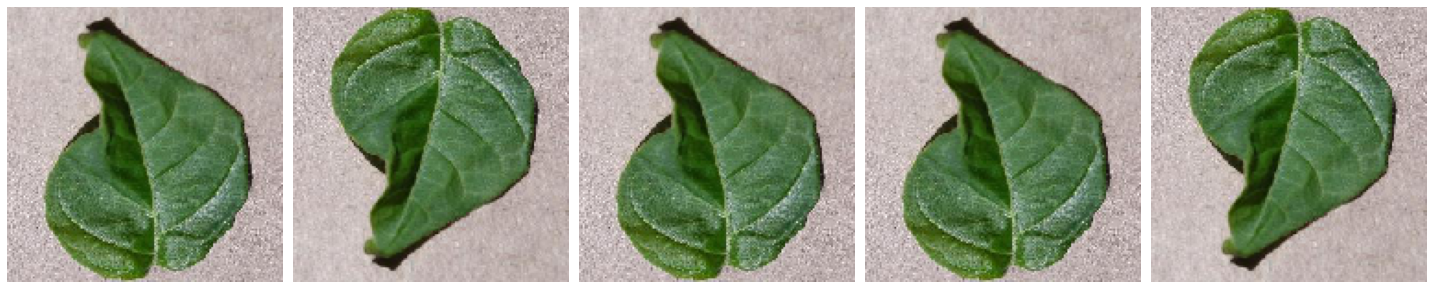

Leaf Vidualization


In [242]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)
print("Leaf Vidualization")

In [243]:
#Variation 1
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True,samplewise_center=True,samplewise_std_normalization=True)

In [244]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_data_dir,
                                               shuffle=True,
                                               target_size=(img_width, img_height))

Found 2421 images belonging to 2 classes.


In [245]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


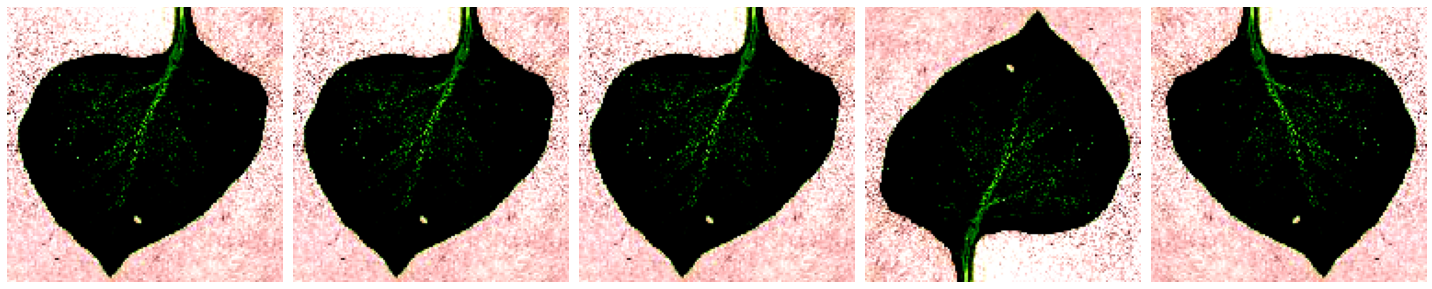

Efected Leaf Vidualization


In [246]:
plotImages(augmented_images)
print("Efected Leaf Vidualization")

In [247]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [248]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=validation_data_dir,
                                               shuffle=True,
                                               target_size=(img_width, img_height))

Found 50 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


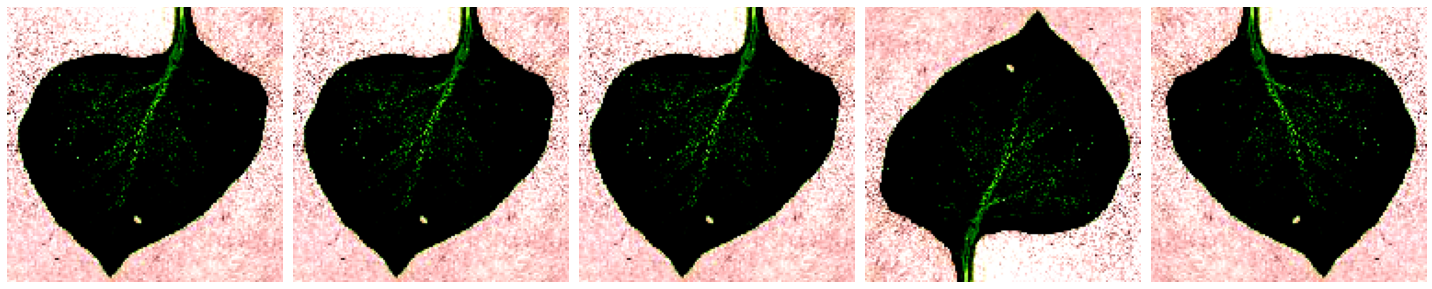

Efected Leaf Vidualization


In [249]:
plotImages(augmented_images)
print("Efected Leaf Vidualization")

In [250]:
#Variation 2
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True)

In [251]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_data_dir,
                                               shuffle=True,
                                               target_size=(img_width, img_height))

Found 2421 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


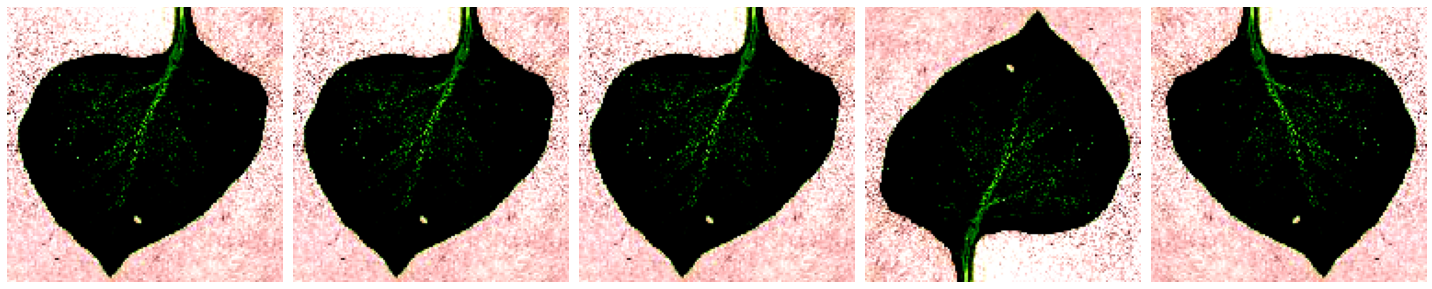

Efected Leaf Vidualization


In [252]:
plotImages(augmented_images)
print("Efected Leaf Vidualization")